# FINAL PROJECT DTS BIGDATA


Peringkat universitas adalah praktik yang sulit, politis, dan kontroversial. Ada ratusan sistem peringkat universitas nasional dan internasional yang berbeda, banyak di antaranya tidak setuju satu sama lain. Dataset ini berisi tiga peringkat universitas global dari tempat yang sangat berbeda.

Dataset ini diambil dari sumber timeshighereducation.com yang membuat ranking universitas dunia yang didirikan di Inggris pada tahun 2010 yang telah dikomersialkan.

Peringkat Akademik Universitas Dunia, juga dikenal sebagai Shanghai Ranking, adalah peringkat yang sama-sama berpengaruh. Perusahaan ini didirikan di Cina pada tahun 2003.

Bagaimana peringkat ini dibandingkan satu sama lain?
Apakah berbagai kritik terhadap peringkat ini adil atau tidak?
Bagaimana almamater Anda melawan dunia?
Data pelengkap
Untuk lebih memperluas analisis Anda, kami juga menyertakan dua set data tambahan.

Yang pertama adalah seperangkat data tentang pencapaian pendidikan di seluruh dunia. Itu berasal dari Bank Data Dunia dan terdiri dari informasi dari Institut Statistik UNESCO dan Barro-Lee Dataset.

Dataset tambahan kedua berisi informasi tentang pengeluaran langsung publik dan swasta untuk pendidikan lintas negara. Data ini berasal dari Pusat Nasional untuk Statistik Pendidikan. Ini mewakili pengeluaran sebagai persentase dari produk domestik bruto. Apakah pengeluaran lebih banyak untuk pendidikan mengarah ke peringkat universitas internasional yang lebih baik?

## Import Data

melakukan import Dataset dari AWS S3

In [24]:
import pandas as pd
namaFilefo = "https://proyekbigdata2019.s3.amazonaws.com/timesData.csv"
data = pd.read_csv(namaFilefo)
sum = data.head()
#print(sum)
data

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


## Membuat Scatter Plot

Membuat Scatter Plot bertujuan untuk mencari hubungan antar variabel yang memiliki kecocokan atau keterkaitan. Setelah melakukan scatter plot pada variabel yang memiliki hubungan melalui scatter plot, lalu dilakukan correlation coefficient untuk mengetahui mana variabel yang memiliki korelasi terkuat pada langkah selanjutnya.

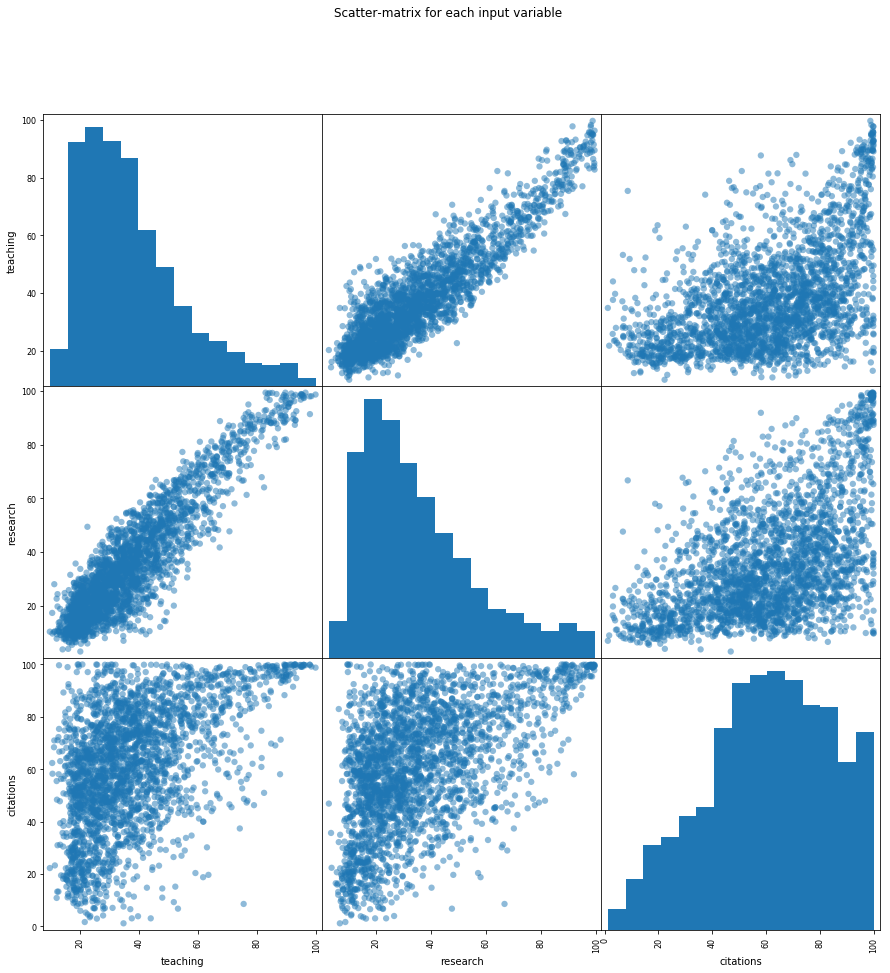

In [23]:
import pandas as pd
from matplotlib import cm
feature_names = ['teaching','research','citations']
X = data[feature_names]
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, marker = 'bo', s=40, hist_kwds={'bins':15}, figsize=(15,15), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('data_scatter_matrix')

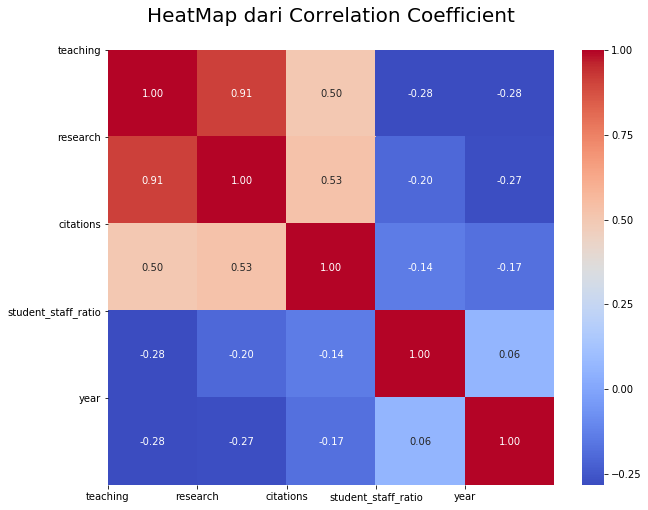

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8)) # Ukuran grafik

# Membuat Heat Map, yang bisa diberi anotasi dan nilai
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns) # Memberi label X
plt.yticks(range(len(corr.columns)), corr.columns) # Memberi label Y
plt.title("HeatMap dari Correlation Coefficient\n", fontsize= 20)

plt.show()




Grafik Heatmap diatas menunjukkan nilai korelasi antar variabel dengan nilai tertinggi adalah nilai yang mendekati nilai 1. Dapat dilihat dari grafik diatas bahwa variabel "teaching" dan variabel "research" yang memiliki nilai korelasi 0.91. Dibawah ini menunjukkan Scatter Plot hubungan natara kedua variabel tersebut.

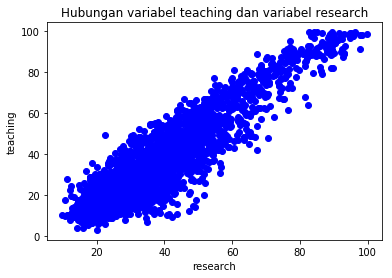

In [26]:
import matplotlib.pyplot as plt

df = pd.DataFrame()

x = data["teaching"]
y = data["research"]

x_data = x
y_data = y

plt.plot(x,y,"bo")
plt.title("Hubungan variabel teaching dan variabel research")
plt.ylabel("teaching")
plt.xlabel("research")
plt.show()

# Statistik Deskriptif

In [7]:
display(data["teaching"].describe()) # Menampilkan Statistik deskriptif untuk data FS1
display(data["research"].describe()) # Menampilkan Statistik deskriptif untuk data SE

count    2603.000000
mean       37.801498
std        17.604218
min         9.900000
25%        24.700000
50%        33.900000
75%        46.400000
max        99.700000
Name: teaching, dtype: float64

count    2603.000000
mean       35.910257
std        21.254805
min         2.900000
25%        19.600000
50%        30.500000
75%        47.250000
max        99.400000
Name: research, dtype: float64



_Count_ adalah jumlah hitungan. _Mean_ adalah nilai rata-rata dari variabel numerik. _Std_ adalah standar deviasi. _Min_ adalah nilai terkecil dari suatu variabel atau kolom yang dipilih. _25% 50% 75%_ adalah nilai persentase yang telah ditentukan pada variabel. _Max_ adalah nilai terbesar dari suatu variabel.

# Regresi Linier dan non Linier

## Regresi Linier

melakukan Regresi Linier pada variabel yang memiliki korelasi terbaik, yaitu adalah variabel teaching dan variabel research yang bertujuan untuk memprediksi hasil daro data-data yang telah dimilki sebelumnya

In [9]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math


x = data["teaching"]
y = data["research"]

np.random.seed(0)

# Menormalisasi data
xdata =x/max(x)
ydata =y/max(y)



# Membagi data sebagai data train dan data test dengan perbandingan 8:2
msk = np.random.rand(len(x)) < 0.8

train_x = np.array(xdata[msk]).reshape(-1,1)
test_x = np.array(xdata[~msk]).reshape(-1,1)
train_y = np.array(ydata[msk]).reshape(-1,1)
test_y = np.array(ydata[~msk]).reshape(-1,1)

model = LinearRegression()
model.fit(train_x,train_y)

intercept = model.intercept_ # Menghitung Intersepsi (b0)
slope = model.coef_[0] # Menghitung Slop (b1)
r_sq = model.score(train_x,train_y) # Menghitung hubungan variabel x dan y

pred_y = model.predict(test_x)

print('Intercept: {:0.2f}'.format(intercept[0]))
print('Slope: {:0.2f}'.format(slope[0]))
print('R\u00b2: {:0.2f}'.format(r_sq))

mae = mean_absolute_error(test_y, pred_y)  
mse = mean_squared_error(test_y, pred_y)
rmse = math.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)

result = pd.DataFrame() # Membuat dataframe untuk menampung hasil
result["Linear"] = [mae,mse,rmse,r_sq]

Intercept: -0.05
Slope: 1.10
R²: 0.83
MAE: 0.06631475212139577
MSE: 0.007041185166501234


## Regresi Non Linier 

Setelah melakukan regresi linier. Lalu dilakukan regresi Non Linier dengan variabel yang sama. Regresi Non Linier dilakukan menggunakan fungsi Sigmoid, Eksponensial, Kubik, dan Kuadratik.

In [10]:
# Fungsi Sigmoid
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

# Fungsi Eksponensial
def expo(x,Beta_0, Beta_1):
    y = Beta_0*np.exp(Beta_1*x)
    return y

# Fungsi Kubik
def qubic(x,Beta_0,Beta_1,Beta_2,Beta_3):
    y = Beta_0+Beta_1*x+Beta_2*x**2+Beta_3*x**3
    return y

# Fungsi Kuadratik
def quad(x,Beta_0,Beta_1,Beta_2):
    y = Beta_0+Beta_1*x+Beta_2*x**2
    return y

Kemudian melakukan evaluasi model dengan menghitung Mean Square Error ,Mean Absolut Error, RMSE, dan R-2 Score dari masing-masing fungsi yang digunakan. prses penghitungan dan hasilnya adalah sebagai berikut:

In [11]:


from scipy.optimize import curve_fit
import numpy as np

func = ['Sigmoid','Eksponensial','Kubik','Kuadratik']

for i in range(len(func)):
    # Membangun model
    if(i == 0):
        # Membangun model dengan data train
        popt, pcov = curve_fit(sigmoid, train_x.flatten(), train_y.flatten()) 
        y_hat = sigmoid(test_x, *popt) # Memprediksi dengan test set
    if(i == 1):
        # Membangun model dengan data train
        popt, pcov = curve_fit(expo, train_x.flatten(), train_y.flatten())
        y_hat = expo(test_x, *popt) # Memprediksi dengan test set
    if(i == 2):
        # Membangun model dengan data train
        popt, pcov = curve_fit(qubic, train_x.flatten(), train_y.flatten()) 
        y_hat = qubic(test_x, *popt) # Memprediksi dengan test set
    if(i == 3):
        # Membangun model dengan data train
        popt, pcov = curve_fit(quad, train_x.flatten(), train_y.flatten()) 
        y_hat = quad(test_x, *popt) # Memprediksi dengan test set  
    
    mae = np.mean(np.absolute(y_hat - test_y)) # Menghitung Mean Absolute Error
    mse = np.mean((y_hat - test_y) ** 2) # Menghitung Mean Square Error
    r2  = r2_score(y_hat , test_y) # Menghitung R2
    rmse = math.sqrt(mse)

    # Evaluasi
    print("\n{}".format(func[i]))
    print("MAE using {} Function: {:0.2E} ".format(func[i],mae))
    print("MSE using {} Function: {:0.2E}".format(func[i],mse))
    print("RMSE using {} Function: {:0.2E}".format(func[i],rmse))
    print("R2-score using {} Function: {:0.2E}".format(func[i],r2))
    
    result[func[i]] = [mae,mse,rmse,r2] # Menyimpan hasil

result.rename(index={0:'MAE',1:'MSE', 2:'RMSE',3:'R2'}, inplace=True)
print('\n')
display(result)




Sigmoid
MAE using Sigmoid Function: 6.69E-02 
MSE using Sigmoid Function: 7.05E-03
RMSE using Sigmoid Function: 8.40E-02
R2-score using Sigmoid Function: 7.97E-01

Eksponensial
MAE using Eksponensial Function: 7.84E-02 
MSE using Eksponensial Function: 9.11E-03
RMSE using Eksponensial Function: 9.54E-02
R2-score using Eksponensial Function: 6.58E-01

Kubik
MAE using Kubik Function: 6.61E-02 
MSE using Kubik Function: 6.91E-03
RMSE using Kubik Function: 8.31E-02
R2-score using Kubik Function: 8.02E-01

Kuadratik
MAE using Kuadratik Function: 6.63E-02 
MSE using Kuadratik Function: 6.98E-03
RMSE using Kuadratik Function: 8.35E-02
R2-score using Kuadratik Function: 7.97E-01




,Linear,Sigmoid,Eksponensial,Kubik,Kuadratik
MAE,0.066315,0.066896,0.078440,0.066119,0.066275
MSE,0.007041,0.007048,0.009108,0.006913,0.006979
RMSE,0.083912,0.083953,0.095436,0.083142,0.083540
R2,0.832240,0.796651,0.657790,0.802114,0.796758


Dari proses evaluasi model diatas dengan menghitung nilai Mean Square Error ,Mean Absolut Error, RMSE, dan R-2 Score dari masing-masing fungsi yang digunakan, dapat diketahui bahwa fungsi linier adalah fungsi dengan R-2 Score tertinggi, fungsi kubik adalah fungsi dengan MAE, MSE, dan RMSE terendah. Maka fungsi yang cocok untuk regresi Non Linier dengan dataset World University Ranking adalah dengan fungsi Kubik/

Melakukan proses regresi non linier dengan fungsi Kubik yang ditampilkan dengan scatter plot

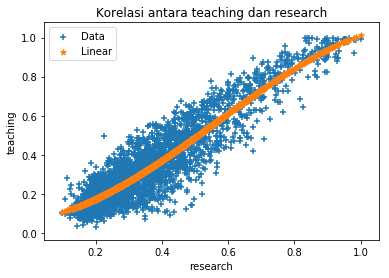

In [28]:

popt1, pcov1 = curve_fit(qubic, train_x.flatten(), train_y.flatten())
y = qubic(xdata, *popt1)
plt.scatter(xdata, ydata,marker = '+',label = "Data")
plt.scatter(xdata,y, marker = '*',label = "Linear")

plt.legend(loc='best')
plt.ylabel('teaching')
plt.xlabel('research')
plt.title("Korelasi antara teaching dan research")
plt.show()

langkah selanjutnya adalah melakukan clustering dengan metode K-Means untuk melakukan pemodelan data tanpa supervisi. Proses dan hasilnya adalah sebagai berikut :

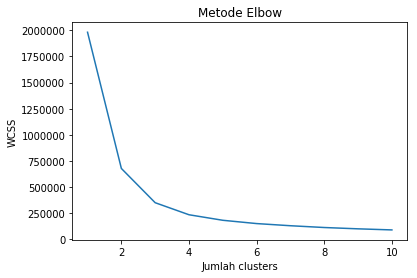

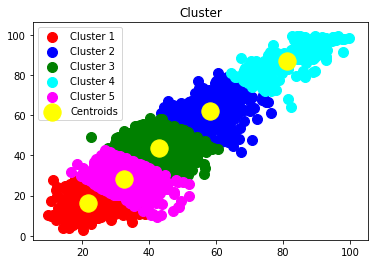

In [27]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Mengimpor dataset
dataset = pd.read_csv('https://proyekbigdata2019.s3.amazonaws.com/timesData.csv')
X = dataset.iloc[:, [3,5]].values
 
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()
 
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster')
plt.legend()
plt.show()

Dari proses clustering denagn metode K-Means diatas dapat diketahui bahwa dari korelasi variabel teaching dan variabel research dari dataset World University Ranking dengan terdapat 5 buah cluster dan dari grafik metode elbow dapat diketahui semakin banyaknya jumlah cluster semakin rendah nilai WCSS.

# Daftar Pustaka

    1. kaggle.com/mylesoneill/world-university-rankings Myles O'Neill
    2. github.com/triopu/Final-Project/blob/master/final_project.ipynb 
    3. informatikalogi.com/algoritma-k-means-clustering/